## Import Libraries

In [1]:
# Import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import statsmodels.api as sm

## Load Datasets

In [2]:
# Define the path to the cloned repository directory
repository_path = "C:\\Users\\eklou"

# List all files in the directory
all_files = os.listdir(repository_path)

# Filter only CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

# Read and display CSV files
for csv_file in csv_files:
    #file_path = os.path.join(repository_path, file)
    print(csv_file)

anime.csv
articles.csv
Cab_Data.csv
City.csv
customers.csv
Customer_ID.csv
data.csv
data_cleaned.csv
data_sale_size.csv
House_Rent_Dataset.csv
musae_chameleon_edges.csv
output.csv
rating.csv
sample_submission.csv
transactions_train.csv
Transaction_ID.csv


## Data Cleaning and Wranging

In [3]:
# Read Cab_Data.csv in one cell

df_Cab_Data = pd.read_csv("Cab_Data.csv")
df_Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# Check data types and missing values

display(df_Cab_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


None

In [5]:
# Convert "Transaction ID" column to string
df_Cab_Data['Transaction ID'] = df_Cab_Data['Transaction ID'].astype(str)

# Convert the "Date of travel" column to datetime format
df_Cab_Data['date of travel'] = pd.to_datetime(df_Cab_Data['Date of Travel'])

# Create dummy variables for "Company" column
dummy_Company = pd.get_dummies(df_Cab_Data['Company'], prefix='Company', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df_Cab_Data = pd.concat([df_Cab_Data, dummy_Company], axis=1)

# Check data types and missing values
display(df_Cab_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  object        
 1   Date of Travel      359392 non-null  int64         
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   date of travel      359392 non-null  datetime64[ns]
 8   Company_Yellow Cab  359392 non-null  uint8         
dtypes: datetime64[ns](1), float64(3), int64(1), object(3), uint8(1)
memory usage: 22.3+ MB


None

In [6]:
# Read City.csv file

df_City = pd.read_csv("City.csv")
df_City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
# Check data types and missing values
display(df_City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


None

In [8]:
# Convert "Population" and "Users" columns to integer
df_City['Population'] = pd.to_numeric(df_City['Population'].str.replace(',', ''), errors='coerce').astype(pd.Int64Dtype())
df_City['Users'] = pd.to_numeric(df_City['Users'].str.replace(',', ''), errors='coerce').astype(pd.Int64Dtype())

# Display df_City
df_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     Int64 
 2   Users       20 non-null     Int64 
dtypes: Int64(2), object(1)
memory usage: 648.0+ bytes


In [9]:
# Read Customer_ID.csv file
df_Customer_ID = pd.read_csv("Customer_ID.csv")
df_Customer_ID.head()


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
# Check data types and missing values
display(df_Customer_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

In [11]:
# Convert "Numbers" column to string
df_Customer_ID['Customer ID'] = df_Customer_ID['Customer ID'].astype(str)

# Create dummy variables for "gender" column
dummy_gender = pd.get_dummies(df_Customer_ID['Gender'], prefix='Gender', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df_Customer_ID = pd.concat([df_Customer_ID, dummy_gender], axis=1)

# Check data types and missing values
display(df_Customer_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  object
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
 4   Gender_Male         49171 non-null  uint8 
dtypes: int64(2), object(2), uint8(1)
memory usage: 1.5+ MB


None

In [12]:
# Read Transaction_ID.csv in one cell

df_Transaction_ID = pd.read_csv("Transaction_ID.csv")
df_Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
# Check data types and missing values
display(df_Transaction_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


None

In [14]:
# Convert IDs to String

df_Transaction_ID['Transaction ID'] = df_Transaction_ID['Transaction ID'].astype(str)
df_Transaction_ID['Customer ID'] = df_Transaction_ID['Customer ID'].astype(str)

# Create dummy variables for "gender" column
dummy_Payment_Mode = pd.get_dummies(df_Transaction_ID['Payment_Mode'], prefix='Payment_Mode', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df_Transaction_ID = pd.concat([df_Transaction_ID, dummy_Payment_Mode], axis=1)

# Check data types and missing values
display(df_Transaction_ID.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Transaction ID     440098 non-null  object
 1   Customer ID        440098 non-null  object
 2   Payment_Mode       440098 non-null  object
 3   Payment_Mode_Cash  440098 non-null  uint8 
dtypes: object(3), uint8(1)
memory usage: 10.5+ MB


None

In [15]:
# Remove duplicates

df_Cab_Data = df_Cab_Data.drop_duplicates()
df_City = df_City.drop_duplicates()
df_Customer_ID = df_Customer_ID.drop_duplicates()
df_Transaction_ID = df_Transaction_ID.drop_duplicates()

In [16]:
# Merge data

df_Cab_Data_merged = df_Cab_Data.merge(df_Transaction_ID, on='Transaction ID', how='inner')
df_City_merged = df_Cab_Data_merged.merge(df_City, on='City', how='left')
df_Transaction_ID_merged = df_Customer_ID.merge(df_Transaction_ID, on='Customer ID', how='inner')

In [17]:
df_Cab_Data_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date of travel,Company_Yellow Cab,Customer ID,Payment_Mode,Payment_Mode_Cash
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1970-01-01 00:00:00.000042377,0,29290,Card,0
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1970-01-01 00:00:00.000042375,0,27703,Card,0
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1970-01-01 00:00:00.000042371,0,28712,Cash,1
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1970-01-01 00:00:00.000042376,0,28020,Cash,1
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1970-01-01 00:00:00.000042372,0,27182,Card,0


In [18]:
df_City_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date of travel,Company_Yellow Cab,Customer ID,Payment_Mode,Payment_Mode_Cash,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1970-01-01 00:00:00.000042377,0,29290,Card,0,814885,24701
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1970-01-01 00:00:00.000042375,0,27703,Card,0,814885,24701
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1970-01-01 00:00:00.000042371,0,28712,Cash,1,814885,24701
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1970-01-01 00:00:00.000042376,0,28020,Cash,1,814885,24701
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1970-01-01 00:00:00.000042372,0,27182,Card,0,814885,24701


In [19]:
df_Transaction_ID_merged.head()

,Customer ID,Gender,Age,Income (USD/Month),Gender_Male,Transaction ID,Payment_Mode,Payment_Mode_Cash
0,29290,Male,28,10813,1,10000011,Card,0
1,29290,Male,28,10813,1,10351127,Cash,1
2,29290,Male,28,10813,1,10412921,Card,0
3,27703,Male,27,9237,1,10000012,Card,0
4,27703,Male,27,9237,1,10320494,Card,0


In [20]:
# Calculate the Profit/loss
df_City_merged['Profit/loss'] = (df_City_merged['Price Charged'] - df_City_merged["Cost of Trip"])/df_City_merged['KM Travelled']

In [21]:
df_City_merged.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date of travel,Company_Yellow Cab,Customer ID,Payment_Mode,Payment_Mode_Cash,Population,Users,Profit/loss
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1970-01-01 00:00:00.000042377,0,29290,Card,0,814885,24701,1.882266
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1970-01-01 00:00:00.000042375,0,27703,Card,0,814885,24701,0.826904
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1970-01-01 00:00:00.000042371,0,28712,Cash,1,814885,24701,3.049558
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1970-01-01 00:00:00.000042376,0,28020,Cash,1,814885,24701,0.777751
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1970-01-01 00:00:00.000042372,0,27182,Card,0,814885,24701,1.929439


In [22]:
#df_Transaction_ID_merged_all.head()

## Basic statistics 

In [23]:
# Basic statistics Cab_Data
display(df_Cab_Data_merged.describe())

,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Company_Yellow Cab,Payment_Mode_Cash
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,42964.067998,22.567254,423.443311,286.190113,0.764294,0.400365
std,307.467197,12.233526,274.378911,157.993661,0.424440,0.489973
min,42371.000000,1.900000,15.600000,19.000000,0.000000,0.000000
25%,42697.000000,12.000000,206.437500,151.200000,1.000000,0.000000
50%,42988.000000,22.440000,386.360000,282.480000,1.000000,0.000000
75%,43232.000000,32.960000,583.660000,413.683200,1.000000,1.000000
max,43465.000000,48.000000,2048.030000,691.200000,1.000000,1.000000


In [24]:
# Basic statistics Customer_ID
display(df_Customer_ID.describe())

,Age,Income (USD/Month),Gender_Male
count,49171.000000,49171.000000,49171.000000
mean,35.363121,15015.631856,0.540196
std,12.599066,8002.208253,0.498387
min,18.000000,2000.000000,0.000000
25%,25.000000,8289.500000,0.000000
50%,33.000000,14656.000000,1.000000
75%,42.000000,21035.000000,1.000000
max,65.000000,35000.000000,1.000000


In [25]:
# Basic statistics Transaction_ID
display(df_Transaction_ID_merged.describe())

,Age,Income (USD/Month),Gender_Male,Payment_Mode_Cash
count,440098.000000,440098.000000,440098.000000,440098.000000
mean,35.360197,15092.181989,0.583077,0.400154
std,12.582668,7987.309505,0.493050,0.489930
min,18.000000,2000.000000,0.000000,0.000000
25%,25.000000,8391.000000,0.000000,0.000000
50%,33.000000,14767.000000,1.000000,0.000000
75%,42.000000,21084.000000,1.000000,1.000000
max,65.000000,35000.000000,1.000000,1.000000


## Seasonality of Companies by Month

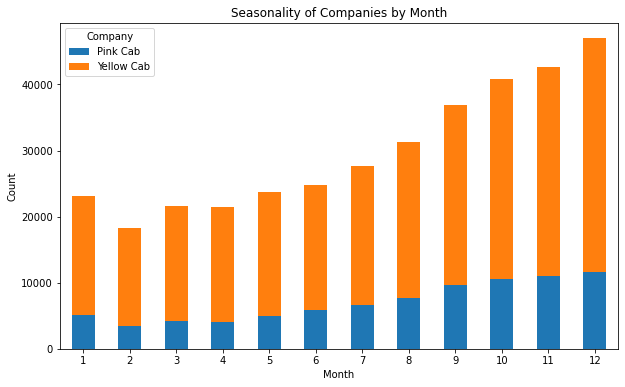

In [26]:
df_City_merged['date of travel'] = pd.to_datetime(df_City_merged['Date of Travel'], unit='D', origin='1899-12-30')

# Group by month and company, and calculate the count
df_City_merged['Month'] = df_City_merged['date of travel'].dt.month
grouped = df_City_merged.groupby(['Month', 'Company']).size().unstack(fill_value=0)

# Plot the seasonality
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Seasonality of Companies by Month')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.show()


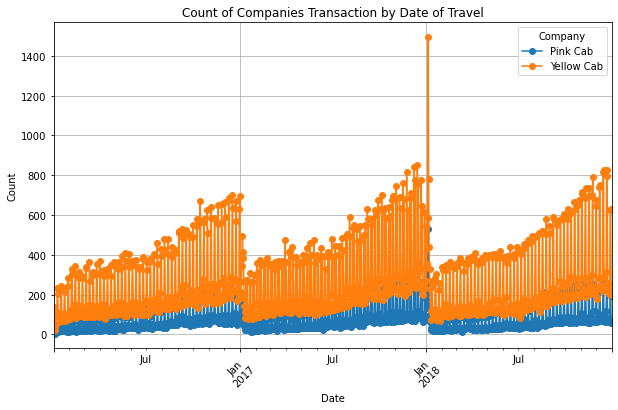

In [27]:
# Sample time series 
# Group by date and company, and calculate the count
grouped = df_City_merged.groupby(['date of travel', 'Company']).size().unstack(fill_value=0)

# Plot the time series
plt.figure(figsize=(10, 6))
grouped.plot(marker='o', ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Companies Transaction by Date of Travel')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Company')
plt.show()

## Bar Plot: Transaction Count by City

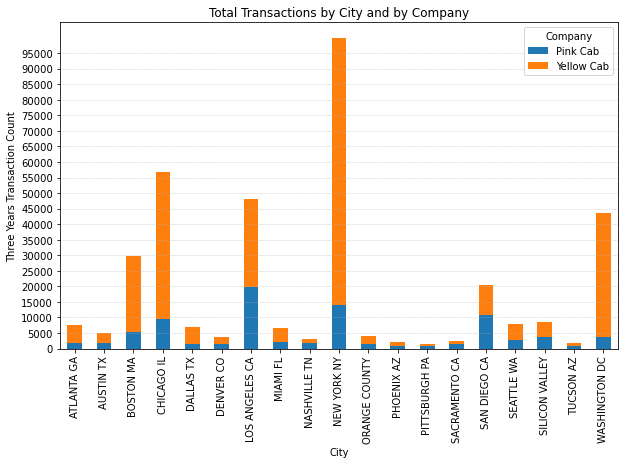

In [28]:
import matplotlib.pyplot as plt

grouped = df_City_merged.groupby(['City', 'Company']).size().unstack(fill_value=0)
#df_Cab_Data_merged['City'] = 
#grouped = df_City_merged.groupby(['City', 'Company']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
ax = grouped.plot(kind='bar', stacked=True, ax=plt.gca())

# Add grid lines at every 5000 units on the y-axis
ax.yaxis.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.set_yticks(range(0, max(grouped.sum(axis=1)) + 1, 5000))

#plt.bar(categories, values)
plt.xlabel('City')
plt.ylabel('Three Years Transaction Count')
plt.title('Total Transactions by City and by Company')
plt.show()

## Distribution of Users by Company

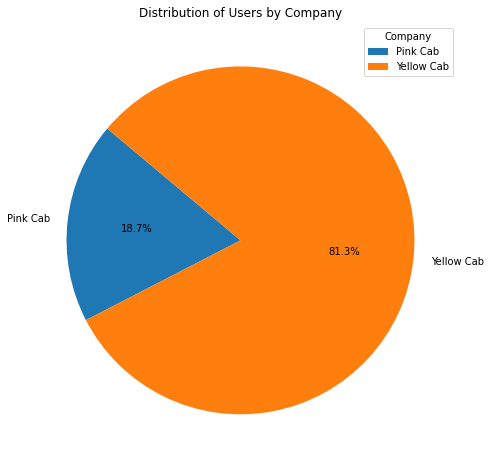

In [29]:
# Group by company and calculate the sum of users
grouped = df_City_merged.groupby('Company')['Users'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
grouped.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Users by Company')
plt.ylabel(None)  # Remove the y-axis label
plt.legend(title='Company', loc='best')
plt.show()

## Distribution of Customers by Age Group

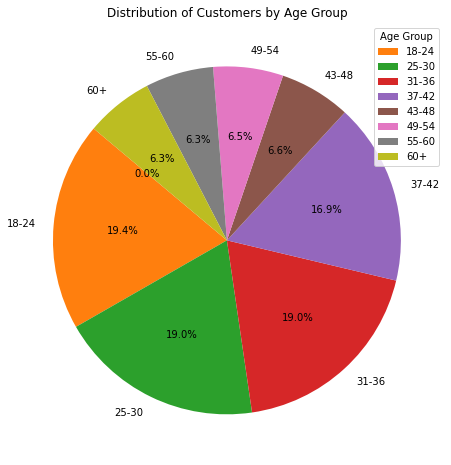

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_Transaction_ID_merged contains the necessary data
# Grouping and counting customers by age group
age_bins = [0, 18, 24, 30, 36, 42, 48, 54, 60, 100]  # Define age bins
age_labels = ['<18', '18-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '60+']  # Labels for age groups

# Apply age grouping to the data
df_Transaction_ID_merged['Age Group'] = pd.cut(df_Transaction_ID_merged['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and count the number of customers
grouped = df_Transaction_ID_merged.groupby('Age Group')['Customer ID'].count()

# Plot the pie chart
plt.figure(figsize=(8, 8))
grouped.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers by Age Group')
plt.ylabel(None)  # Remove the y-axis label
plt.legend(title='Age Group', loc='best')
plt.show()


## Distribution of Customers by Gender

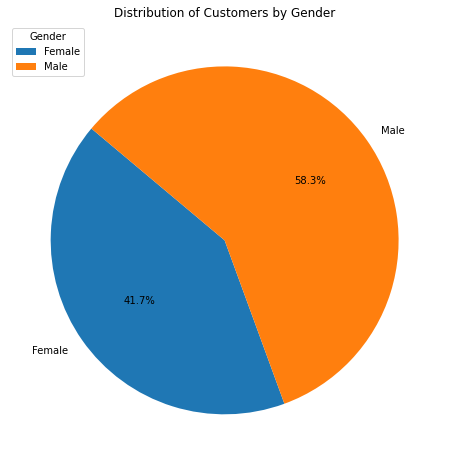

In [31]:
# Group by company and count the number of users by gender
grouped = df_Transaction_ID_merged.groupby('Gender')['Customer ID'].count()

# Plot the pie chart
plt.figure(figsize=(8, 8))
grouped.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers by Gender')
plt.ylabel(None)  # Remove the y-axis label
plt.legend(title='Gender', loc='best')
plt.show()

## Line Plot: Profit/loss by Month

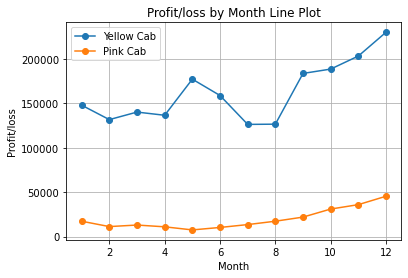

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_City_merged contains the necessary data

# Group the data by Month and Company, and sum up the Profit/Loss
grouped_data = df_City_merged.groupby(['Month', 'Company'])['Profit/loss'].sum().reset_index()

# Create separate dataframes for each company's data
yellow_cab_data = grouped_data[grouped_data['Company'] == 'Yellow Cab']
pink_cab_data = grouped_data[grouped_data['Company'] == 'Pink Cab']

# Plot the data for Yellow Cab
plt.plot(yellow_cab_data['Month'], yellow_cab_data['Profit/loss'], marker='o', label='Yellow Cab')

# Plot the data for Pink Cab
plt.plot(pink_cab_data['Month'], pink_cab_data['Profit/loss'], marker='o', label='Pink Cab')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit/loss')
plt.title('Profit/loss by Month Line Plot')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


## Profit/loss Forecasting for Next 12 Months

C:\Users\eklou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\eklou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\eklou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\eklou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\eklou\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignore

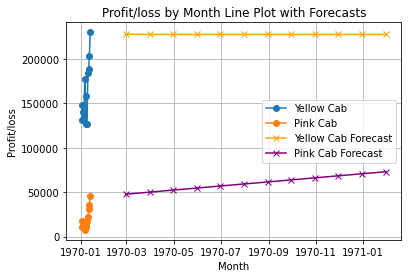

In [33]:
# Assuming df_City_merged contains the necessary data

# Group the data by Month and Company, and sum up the Profit/Loss
grouped_data = df_City_merged.groupby(['Month', 'Company'])['Profit/loss'].sum().reset_index()

# Create separate dataframes for each company's data
yellow_cab_data = grouped_data[grouped_data['Company'] == 'Yellow Cab']
pink_cab_data = grouped_data[grouped_data['Company'] == 'Pink Cab']

# Assuming 'Month' is a datetime column
yellow_cab_data.set_index('Month', inplace=True)
pink_cab_data.set_index('Month', inplace=True)

# Forecasting using ARIMA for Yellow Cab data
model_yellow = sm.tsa.ARIMA(yellow_cab_data['Profit/loss'], order=(1, 1, 1))
results_yellow = model_yellow.fit()
forecast_steps = 12
forecast_yellow = results_yellow.forecast(steps=forecast_steps)  # Forecast 12 months ahead

# Forecasting using ARIMA for Pink Cab data
model_pink = sm.tsa.ARIMA(pink_cab_data['Profit/loss'], order=(1, 1, 1))
results_pink = model_pink.fit()
forecast_pink = results_pink.forecast(steps=forecast_steps)  # Forecast 12 months ahead

# Create a sequence of future months for forecasting
last_month = grouped_data['Month'].max()
future_months = pd.date_range(start=last_month, periods=forecast_steps+1, freq='M')[1:]

# Plot the data and forecasts for both companies
plt.plot(yellow_cab_data.index, yellow_cab_data['Profit/loss'], marker='o', label='Yellow Cab')
plt.plot(pink_cab_data.index, pink_cab_data['Profit/loss'], marker='o', label='Pink Cab')
plt.plot(future_months, forecast_yellow, marker='x', color='orange', label='Yellow Cab Forecast')
plt.plot(future_months, forecast_pink, marker='x', color='purple', label='Pink Cab Forecast')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit/loss')
plt.title('Profit/loss by Month Line Plot with Forecasts')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()


## Histogram: Transaction Frequency by Company

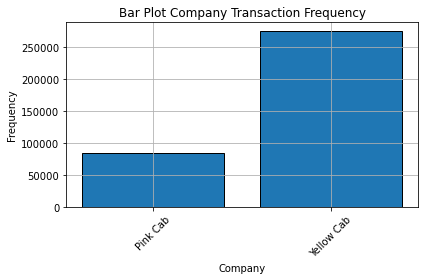

In [34]:
# Assuming 'Company' is the column name you want to plot
column_data = df_Cab_Data_merged['Company']

# Create a bar plot to visualize the frequency of the data
unique_values, counts = np.unique(column_data, return_counts=True)

plt.bar(unique_values, counts, edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Bar Plot Company Transaction Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff

plt.grid(True)  # Add grid lines to the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff

plt.show()

## Scatter Plot: Cost Trip by KM Travelled

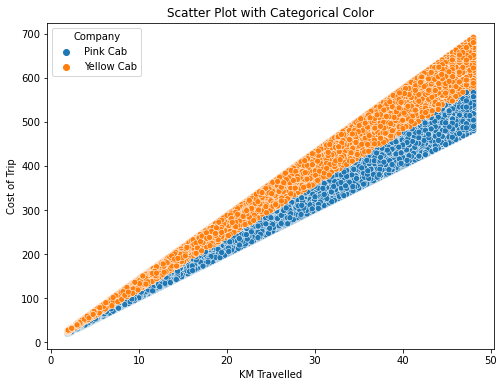

In [35]:
# Create a scatter plot with color-coded categories

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_City_merged, x='KM Travelled', y='Cost of Trip', hue='Company')
plt.title('Scatter Plot with Categorical Color')
plt.show()

## Price Charged by KM Travelled

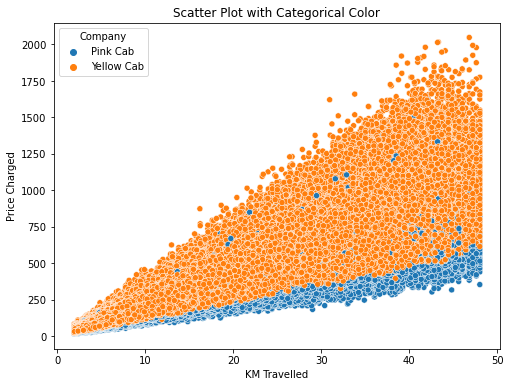

In [36]:
# Create a scatter plot with color-coded categories
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_City_merged, x='KM Travelled', y='Price Charged', hue='Company')
plt.title('Scatter Plot with Categorical Color')
plt.show()

## Box Plot: Data Distribution

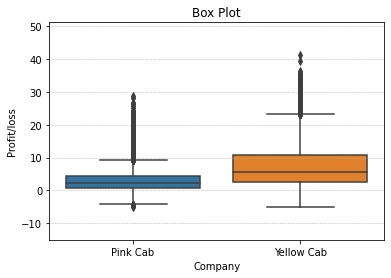

In [37]:
import seaborn as sns


# Plot
sns.boxplot(x='Company', y='Profit/loss', data=df_City_merged)
plt.xlabel('Company')
plt.ylabel('Profit/loss')
plt.title('Box Plot')

# Add grid lines
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.9)

# Adjust plot limits for better visualization
plt.ylim(df_City_merged['Profit/loss'].min() - 10, df_City_merged['Profit/loss'].max() + 10)

plt.show()

## Heatmap: Variable Correlation

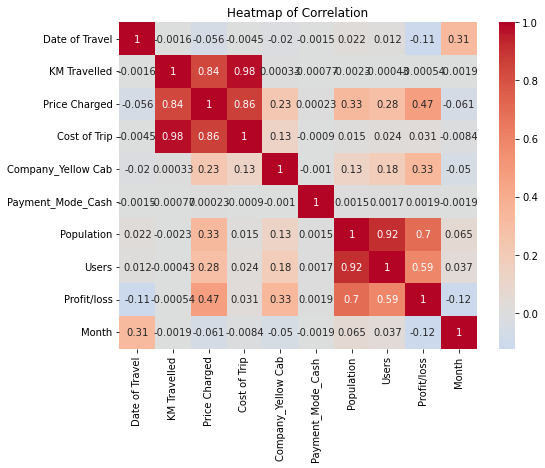

In [38]:
# Drop the 'Company' and 'City' columns
#df_heatmap = df_City_merged.drop(['Company', 'City'], axis=1)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_City_merged.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation')
plt.show()

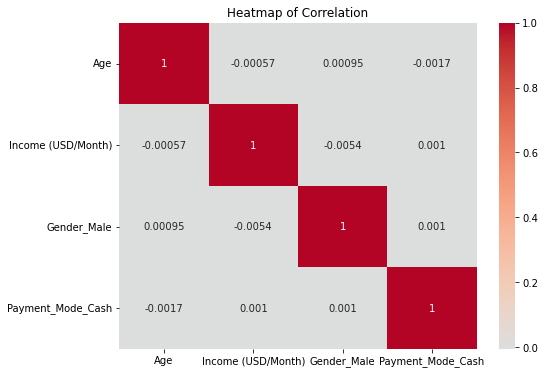

In [39]:
# Drop the 'Company' and 'City' columns
#df_heatmap = df_Transaction_ID_merged.drop(['Gender', 'Payment_Mode'], axis=1)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_Transaction_ID_merged.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation')
plt.show()